# Шаг 1: создаем таблицы, с которыми будем работать.
Код, которым создаются таблицы + пруф загрузки:



```
CREATE TABLE customer (
    customer_id INTEGER PRIMARY KEY,
    first_name VARCHAR(100),
    last_name VARCHAR(100),
    gender VARCHAR(10),
    dob DATE,
    job_title VARCHAR(100),
    job_industry_category VARCHAR(100),
    wealth_segment VARCHAR(50),
    deceased_indicator VARCHAR(1),
    owns_car VARCHAR(3),
    address VARCHAR(200),
    postcode VARCHAR(10),
    state VARCHAR(50),
    country VARCHAR(50),
    property_valuation INTEGER
);
```



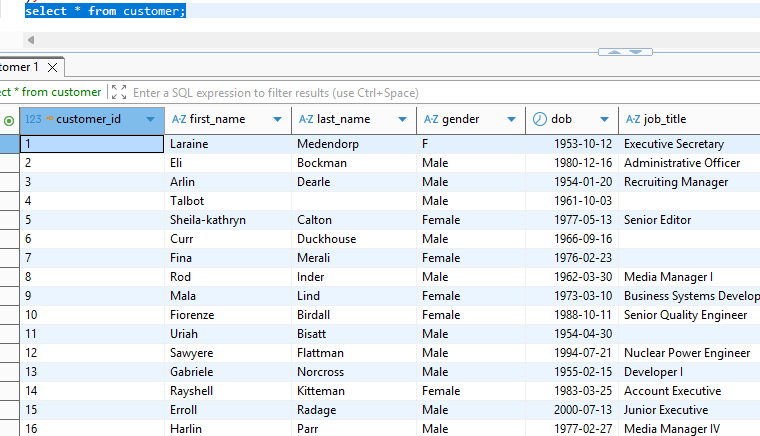



```
CREATE TABLE product (
    product_id INTEGER, --он должен бы был стать primary key, но т.к. есть дубликаты, то с primary key получаем ошибку загрузки
    brand VARCHAR(50),
    product_line VARCHAR(50),
    product_class VARCHAR(50),
    product_size VARCHAR(50),
    list_price NUMERIC(10,2),
    standard_cost NUMERIC(10,2)
);
```



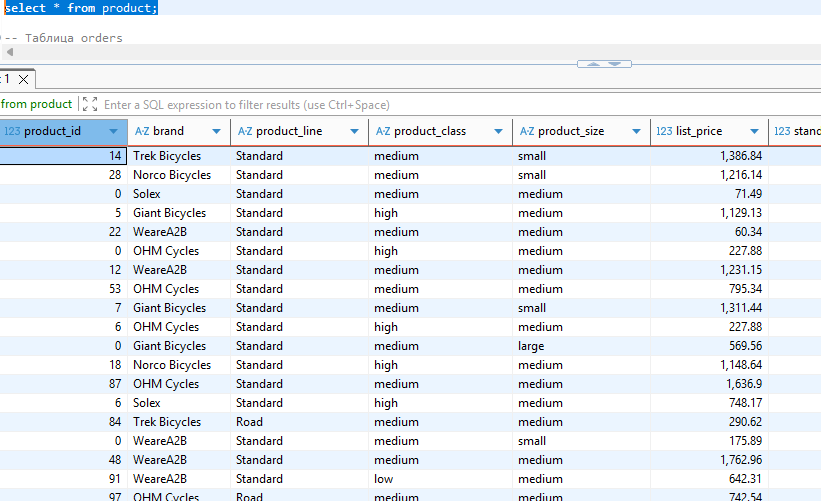


```
CREATE TABLE orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date DATE,
    online_order BOOLEAN,
    order_status VARCHAR(20)
);
```



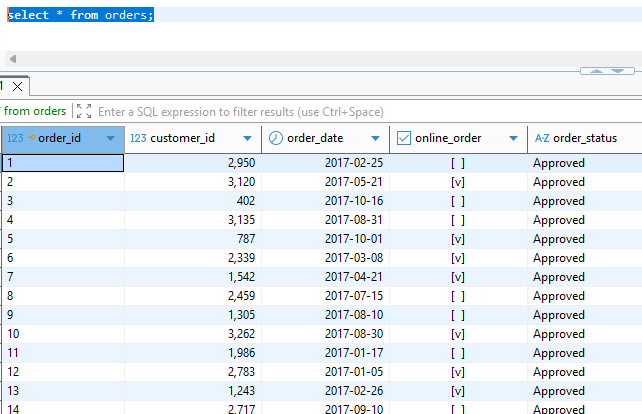



```
CREATE TABLE order_items (
    order_item_id INTEGER PRIMARY KEY,
    order_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    item_list_price_at_sale NUMERIC(10,2),
    item_standard_cost_at_sale NUMERIC(10,2)

);
```



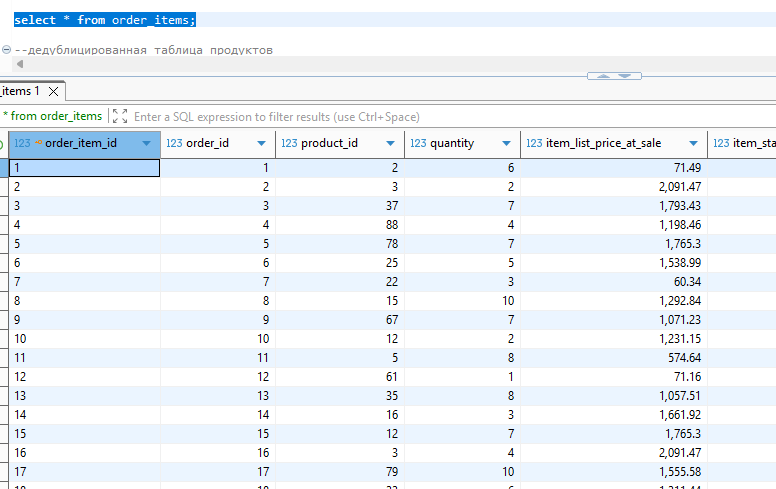

Т.к. в таблице с продуктами есть дубли, мы создаем таблицу, в которой этих дублей не будет.


```
create table product_cor as
 select *
 from (
  select *
   ,row_number() over(partition by product_id order by list_price desc) as rn
  from product)
 where rn = 1;
```




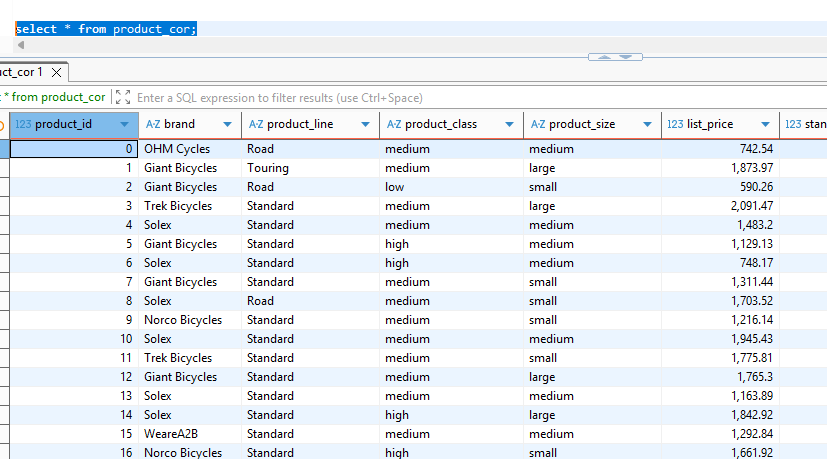

# Шаг 2. Выполняем задания к этим таблицам

1. Вывести все уникальные бренды, у которых есть хотя бы один продукт со стандартной стоимостью выше 1500 долларов, и суммарными продажами не менее 1000 единиц.

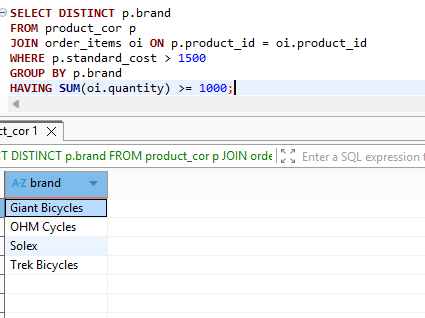

2. Для каждого дня в диапазоне с 2017-04-01 по 2017-04-09 включительно вывести количество подтвержденных онлайн-заказов и количество уникальных клиентов, совершивших эти заказы.

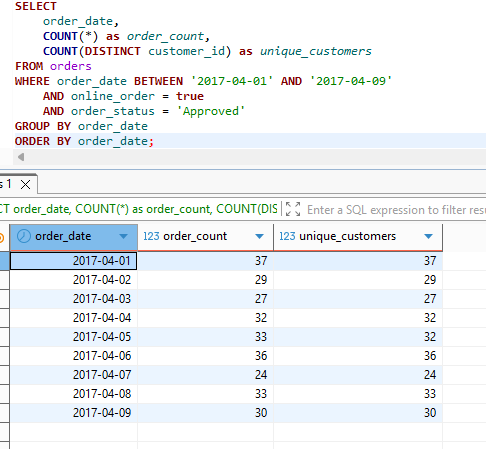

3. Вывести профессии клиентов:
из сферы IT, чья профессия начинается с Senior;
из сферы Financial Services, чья профессия начинается с Lead.
Для обеих групп учитывать только клиентов старше 35 лет. Объединить выборки с помощью UNION ALL.

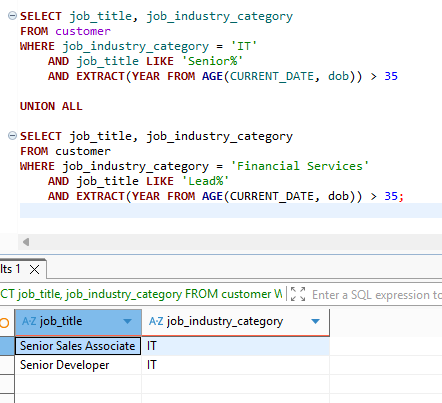

4. Вывести бренды, которые были куплены клиентами из сферы Financial Services, но не были куплены клиентами из сферы IT.

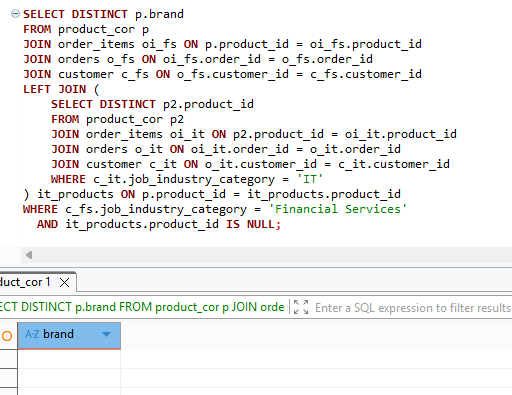

5.Вывести 10 клиентов (ID, имя, фамилия), которые совершили наибольшее количество онлайн-заказов (в штуках) брендов Giant Bicycles, Norco Bicycles, Trek Bicycles, при условии, что они активны и имеют оценку имущества (property_valuation) выше среднего среди клиентов из того же штата.

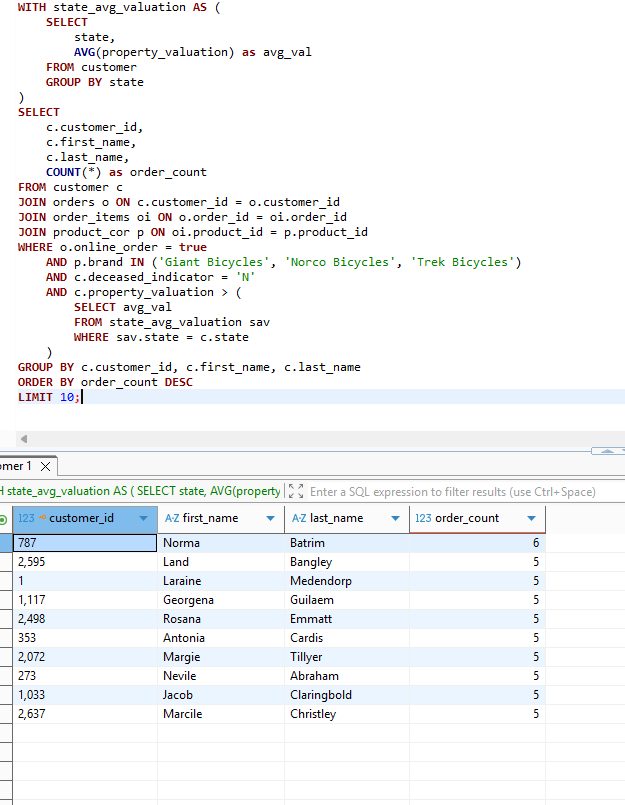

6. Вывести всех клиентов (ID, имя, фамилия), у которых нет подтвержденных онлайн-заказов за последний год, но при этом они владеют автомобилем и их сегмент благосостояния не Mass Customer.

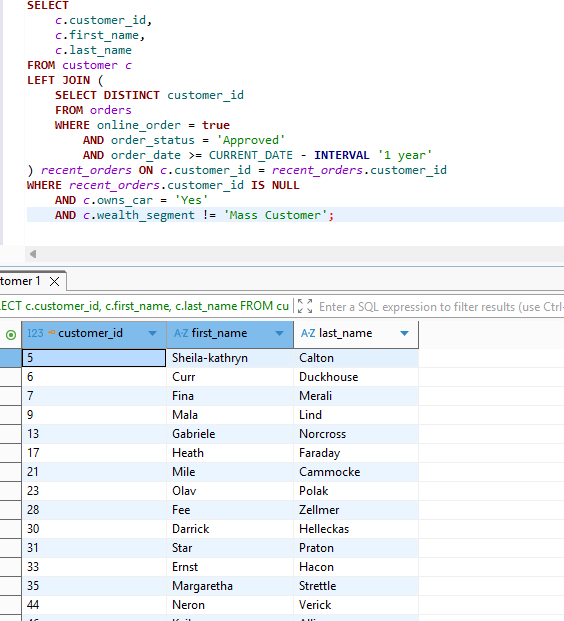

7. Вывести всех клиентов из сферы 'IT' (ID, имя, фамилия), которые купили 2 из 5 продуктов с самой высокой list_price в продуктовой линейке Road.

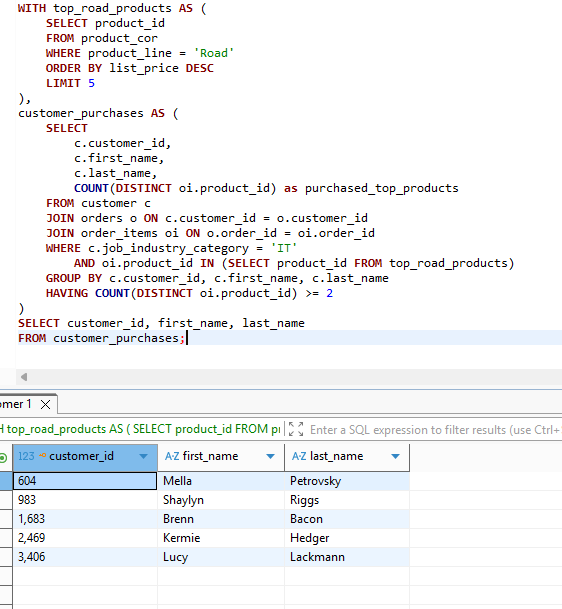

8. Вывести клиентов (ID, имя, фамилия, сфера деятельности) из сфер IT или Health, которые совершили не менее 3 подтвержденных заказов в период 2017-01-01 по 2017-03-01, и при этом их общий доход от этих заказов превышает 10 000 долларов.
Разделить вывод на две группы (IT и Health) с помощью UNION.


```
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    c.job_industry_category,
    COUNT(DISTINCT o.order_id) as order_count,
    SUM(oi.item_list_price_at_sale * oi.quantity) as total_revenue
FROM customer c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
WHERE c.job_industry_category = 'IT'
    AND o.order_date BETWEEN '2017-01-01' AND '2017-03-01'
    AND o.order_status = 'Approved'
GROUP BY c.customer_id, c.first_name, c.last_name, c.job_industry_category
HAVING COUNT(DISTINCT o.order_id) >= 3
    AND SUM(oi.item_list_price_at_sale * oi.quantity) > 10000

UNION

SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    c.job_industry_category,
    COUNT(DISTINCT o.order_id) as order_count,
    SUM(oi.item_list_price_at_sale * oi.quantity) as total_revenue
FROM customer c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
WHERE c.job_industry_category = 'Health'
    AND o.order_date BETWEEN '2017-01-01' AND '2017-03-01'
    AND o.order_status = 'Approved'
GROUP BY c.customer_id, c.first_name, c.last_name, c.job_industry_category
HAVING COUNT(DISTINCT o.order_id) >= 3
    AND SUM(oi.item_list_price_at_sale * oi.quantity) > 10000;
```



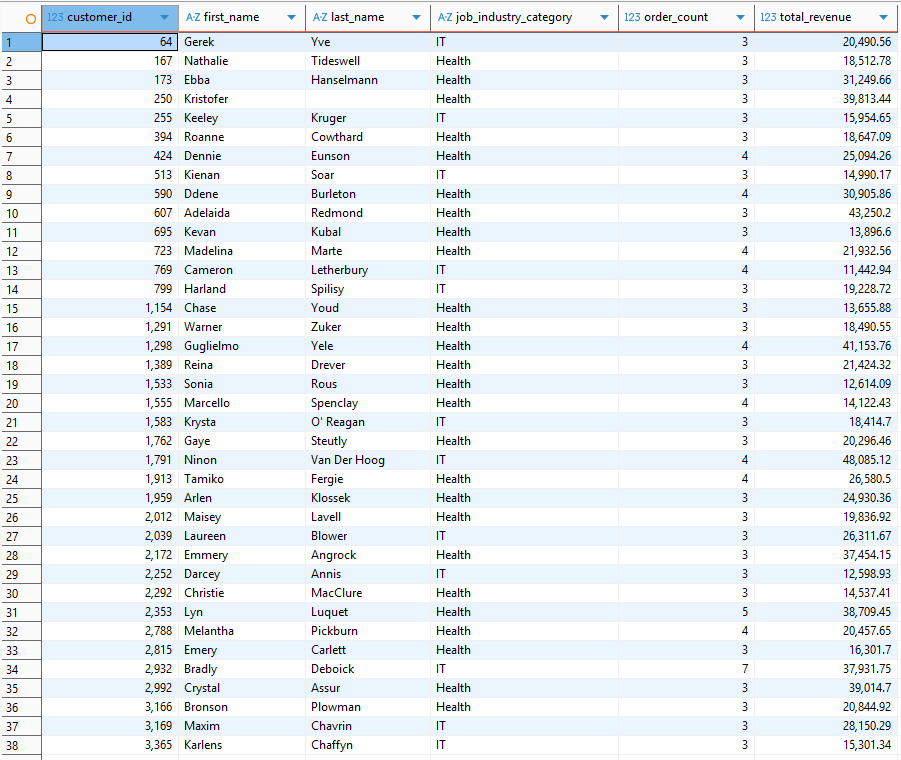